In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Importing and creating dataframes

In [18]:
custm = pd.read_csv("Customer.csv")
custm.tail()

,customer_Id,DOB,Gender,city_code
5642,274474,19-12-1992,M,2.0
5643,267666,24-12-1992,M,6.0
5644,270476,25-12-1992,F,3.0
5645,269626,27-12-1992,F,5.0
5646,274308,29-12-1992,F,5.0


In [10]:
pro_hier = pd.read_csv("prod_cat_info.csv")
pro_hier.head()

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


In [17]:
trans = pd.read_csv("Transactions.csv")
trans.tail()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop
23052,77960931771,271961,25-01-2011,11,5,1,447,46.935,493.935,TeleShop


## Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to keep all customers who have done transactions with us and select the join type accordingly.

In [19]:
test = trans.merge(pro_hier, left_on=['prod_cat_code', 'prod_subcat_code'], right_on=['prod_cat_code', 'prod_sub_cat_code'], how ='left')
test.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,1,Women
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,5,Computers
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,6,DIY
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,11,Bath
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,6,DIY


In [23]:
test.rename(columns={'cust_id':'customer_Id'}, inplace=True)

In [24]:
customer_final = test.merge(custm, on='customer_Id', how='left')
customer_final

,transaction_id,customer_Id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat,DOB,Gender,city_code
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,1,Women,26-09-1981,M,5.0
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,5,Computers,11-05-1973,F,8.0
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,6,DIY,27-07-1992,M,8.0
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,11,Bath,08-06-1981,M,3.0
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,6,DIY,27-07-1992,M,8.0
5,97439039119,272357,23-02-2014,8,3,-2,-824,173.040,-1821.040,TeleShop,Electronics,8,Personal Appliances,09-10-1982,F,6.0
6,45649838090,273667,22-02-2014,11,6,-1,-1450,152.250,-1602.250,e-Shop,Home and kitchen,11,Bath,29-05-1981,M,9.0
7,22643667930,271489,22-02-2014,12,6,-1,-1225,128.625,-1353.625,TeleShop,Home and kitchen,12,Tools,21-04-1971,M,9.0
8,79792372943,275108,22-02-2014,3,1,-3,-908,286.020,-3010.020,MBR,Clothing,3,Kids,04-11-1971,F,8.0
9,50076728598,269014,21-02-2014,8,3,-4,-581,244.020,-2568.020,e-Shop,Electronics,8,Personal Appliances,27-11-1979,F,3.0


## 2. Prepare a summary report for the merged data set.
### a. Get the column names and their corresponding data types


In [27]:
customer_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23053 entries, 0 to 23052
Data columns (total 16 columns):
transaction_id       23053 non-null int64
customer_Id          23053 non-null int64
tran_date            23053 non-null object
prod_subcat_code     23053 non-null int64
prod_cat_code        23053 non-null int64
Qty                  23053 non-null int64
Rate                 23053 non-null int64
Tax                  23053 non-null float64
total_amt            23053 non-null float64
Store_type           23053 non-null object
prod_cat             23053 non-null object
prod_sub_cat_code    23053 non-null int64
prod_subcat          23053 non-null object
DOB                  23053 non-null object
Gender               23044 non-null object
city_code            23045 non-null float64
dtypes: float64(3), int64(7), object(6)
memory usage: 3.0+ MB


### b. Top/Bottom 10 observations


In [36]:
customer_final.head(10)

,transaction_id,customer_Id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat,DOB,Gender,city_code
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,1,Women,26-09-1981,M,5.0
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,5,Computers,11-05-1973,F,8.0
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,6,DIY,27-07-1992,M,8.0
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,11,Bath,08-06-1981,M,3.0
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,6,DIY,27-07-1992,M,8.0
5,97439039119,272357,23-02-2014,8,3,-2,-824,173.040,-1821.040,TeleShop,Electronics,8,Personal Appliances,09-10-1982,F,6.0
6,45649838090,273667,22-02-2014,11,6,-1,-1450,152.250,-1602.250,e-Shop,Home and kitchen,11,Bath,29-05-1981,M,9.0
7,22643667930,271489,22-02-2014,12,6,-1,-1225,128.625,-1353.625,TeleShop,Home and kitchen,12,Tools,21-04-1971,M,9.0
8,79792372943,275108,22-02-2014,3,1,-3,-908,286.020,-3010.020,MBR,Clothing,3,Kids,04-11-1971,F,8.0
9,50076728598,269014,21-02-2014,8,3,-4,-581,244.020,-2568.020,e-Shop,Electronics,8,Personal Appliances,27-11-1979,F,3.0


In [37]:
customer_final.tail(10)

,transaction_id,customer_Id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat,DOB,Gender,city_code
23043,49882891062,271982,25-01-2011,10,5,4,1330,558.600,5878.600,e-Shop,Books,10,Non-Fiction,10-08-1976,M,8.0
23044,14787475597,273982,25-01-2011,4,3,5,969,508.725,5353.725,e-Shop,Electronics,4,Mobiles,12-10-1991,M,4.0
23045,50691119572,273031,25-01-2011,6,5,1,1148,120.540,1268.540,TeleShop,Books,6,DIY,17-01-1980,F,8.0
23046,40893803228,272049,25-01-2011,11,6,3,1077,339.255,3570.255,e-Shop,Home and kitchen,11,Bath,28-06-1975,F,6.0
23047,30856003613,266866,25-01-2011,4,2,2,444,93.240,981.240,TeleShop,Footwear,4,Kids,18-04-1974,M,4.0
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop,Books,12,Academic,21-02-1972,M,7.0
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop,Clothing,4,Mens,27-04-1984,M,9.0
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,2,Furnishing,20-06-1976,M,8.0
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop,Books,11,Children,22-05-1970,M,2.0
23052,77960931771,271961,25-01-2011,11,5,1,447,46.935,493.935,TeleShop,Books,11,Children,15-01-1982,M,1.0


## c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)

In [38]:
customer_final.describe()

,transaction_id,customer_Id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,prod_sub_cat_code,city_code
count,2.305300e+04,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23045.000000
mean,5.007348e+10,271021.746497,6.149091,3.763632,2.432395,636.369713,248.667192,2107.308002,6.149091,5.482534
std,2.898194e+10,2431.692059,3.726372,1.677016,2.268406,622.363498,187.177773,2507.561264,3.726372,2.863499
min,3.268991e+06,266783.000000,1.000000,1.000000,-5.000000,-1499.000000,7.350000,-8270.925000,1.000000,1.000000
25%,2.493864e+10,268935.000000,3.000000,2.000000,1.000000,312.000000,98.280000,762.450000,3.000000,3.000000
50%,5.009313e+10,270980.000000,5.000000,4.000000,3.000000,710.000000,199.080000,1754.740000,5.000000,5.000000
75%,7.533000e+10,273114.000000,10.000000,5.000000,4.000000,1109.000000,365.715000,3569.150000,10.000000,8.000000
max,9.998755e+10,275265.000000,12.000000,6.000000,5.000000,1500.000000,787.500000,8287.500000,12.000000,10.000000


### d. Frequency tables for all the categorical variables

In [43]:
categorical_columns = customer_final.columns.difference(customer_final.describe().columns)

In [77]:
freq_table = pd.DataFrame()
#freq_table.columns = ['item', 'Frequency']
for clm in categorical_columns:
    df = pd.DataFrame(customer_final.loc[:,str(clm)].value_counts().reset_index())
    print(df)


           index  DOB
0     17-09-1982   32
1     27-12-1988   32
2     25-02-1974   27
3     20-03-1972   25
4     18-11-1991   24
5     09-06-1970   24
6     26-05-1977   23
7     21-07-1988   22
8     20-12-1981   22
9     08-03-1983   22
10    08-09-1987   21
11    05-12-1992   21
12    23-06-1986   21
13    16-04-1978   21
14    06-12-1982   21
15    08-05-1988   21
16    21-03-1990   20
17    20-04-1980   20
18    19-03-1971   20
19    10-11-1973   20
20    05-05-1973   19
21    26-06-1975   19
22    27-11-1991   19
23    07-05-1974   19
24    08-10-1987   19
25    29-06-1985   19
26    26-09-1988   19
27    02-02-1974   19
28    17-08-1976   19
29    14-06-1989   19
...          ...  ...
3957  09-04-1977    1
3958  16-07-1974    1
3959  10-11-1990    1
3960  29-07-1985    1
3961  20-04-1984    1
3962  11-08-1974    1
3963  15-03-1990    1
3964  05-11-1986    1
3965  10-08-1984    1
3966  09-05-1976    1
3967  23-10-1988    1
3968  01-06-1988    1
3969  07-08-1974    1
3970  03-0

## 3. Generate histograms for all continuous variables and frequency bars for categorical variables.

In [93]:
cont = customer_final.loc[:, (customer_final.dtypes=='int64') | (customer_final.dtypes=='float64')]
cont.columns

Index(['transaction_id', 'customer_Id', 'prod_subcat_code', 'prod_cat_code',
       'Qty', 'Rate', 'Tax', 'total_amt', 'prod_sub_cat_code', 'city_code'],
      dtype='object')

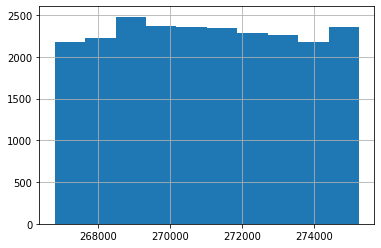

In [95]:
cont.Rate.hist()

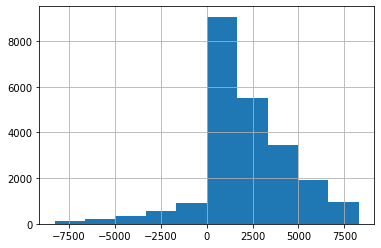

In [96]:
cont.total_amt.hist()

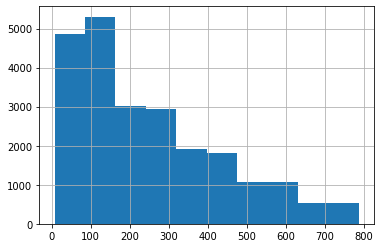

In [98]:
cont.Tax.hist()

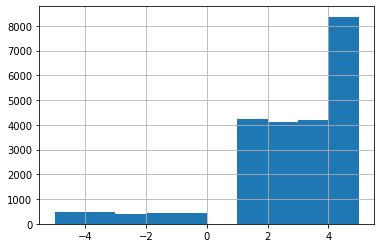

In [99]:
cont.Qty.hist()

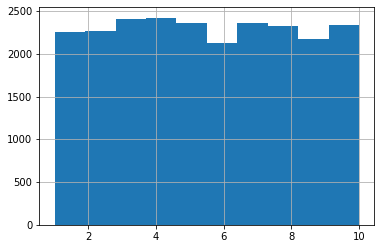

In [100]:
cont.city_code.hist()

In [101]:
cat = customer_final.loc[:, (customer_final.dtypes=='object')]

In [102]:
cat.columns

Index(['tran_date', 'Store_type', 'prod_cat', 'prod_subcat', 'DOB', 'Gender'], dtype='object')

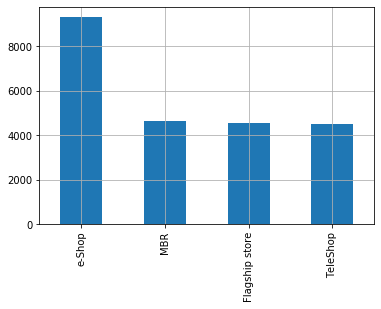

In [107]:
cat.Store_type.value_counts().plot.bar()

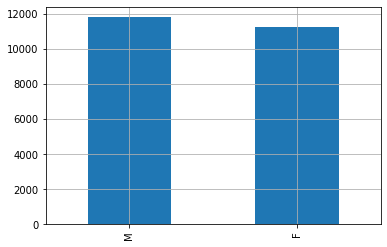

In [109]:
cat.Gender.value_counts().plot.bar()

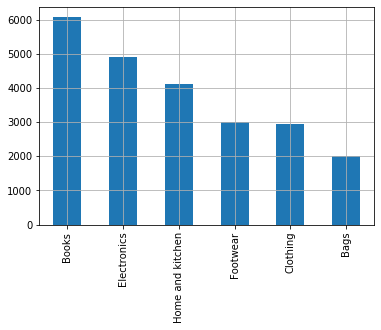

In [110]:
cat.prod_cat.value_counts().plot.bar()

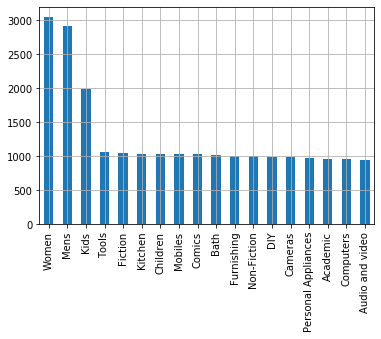

In [111]:
cat.prod_subcat.value_counts().plot.bar()

## 4. Calculate the following information using the merged dataset :
### a. Time period of the available transaction data

In [124]:
trans = pd.Series(customer_final.tran_date.apply(lambda x: x.replace("/", "-")))

In [128]:
trans = pd.to_datetime(trans, format="%d-%m-%Y")

In [145]:
trans.sort_values(inplace = True)

In [146]:
first = trans[trans.size-1]
last = trans[0]
last-first

Timedelta('1130 days 00:00:00')

### b. Count of transactions where the total amount of transaction was negative

In [151]:
negative_trans = len(customer_final[customer_final.total_amt<0].total_amt)

2177

## 5. Analyze which product categories are more popular among females vs male customers.

In [176]:
count_cat = customer_final.groupby(['prod_cat', 'Gender'])['transaction_id'].count().reset_index()
count_cat.rename(columns = {'transaction_id':'count'}, inplace = True)
count_cat

,prod_cat,Gender,count
0,Bags,F,994
1,Bags,M,1004
2,Books,F,2949
3,Books,M,3116
4,Clothing,F,1439
5,Clothing,M,1518
6,Electronics,F,2328
7,Electronics,M,2570
8,Footwear,F,1529
9,Footwear,M,1469


In [178]:
max_tran = count_cat.groupby('prod_cat')['count'].max()
max_gender = count_cat.merge(max_tran, on='count', how='right')

In [174]:
max_gender

,prod_cat,Gender,transaction_id
0,Bags,M,1004
1,Books,M,3116
2,Clothing,M,1518
3,Electronics,M,2570
4,Footwear,F,1529
5,Home and kitchen,M,2134


## 6. Which City code has the maximum customers and what was the percentage of customers from that city?

In [182]:
city_count = customer_final.groupby('city_code')['transaction_id'].count().reset_index()
city_count

,city_code,transaction_id
0,1.0,2258
1,2.0,2270
2,3.0,2411
3,4.0,2422
4,5.0,2360
5,6.0,2127
6,7.0,2356
7,8.0,2330
8,9.0,2178
9,10.0,2333


In [185]:
city_count[city_count.transaction_id == city_count.transaction_id.max()]

,city_code,transaction_id
3,4.0,2422


## 7. Which store type sells the maximum products by value and by quantity?

In [188]:
quantity = customer_final.groupby('Store_type')['Qty'].sum().reset_index()
quantity

,Store_type,Qty
0,Flagship store,11133
1,MBR,11194
2,TeleShop,10984
3,e-Shop,22763


In [190]:
quantity[quantity.Qty == quantity.Qty .max()]

,Store_type,Qty
3,e-Shop,22763


In [193]:
value = customer_final.groupby('Store_type')['total_amt'].sum().reset_index()
value

,Store_type,total_amt
0,Flagship store,9.715688e+06
1,MBR,9.674486e+06
2,TeleShop,9.364781e+06
3,e-Shop,1.982482e+07


In [194]:
value[value.total_amt == value.total_amt.max()]

,Store_type,total_amt
3,e-Shop,19824816.05


## 8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?

In [197]:
cat_val = customer_final.groupby(['Store_type', 'prod_cat'])['total_amt'].sum().reset_index()
flagship = cat_val[cat_val.Store_type == 'Flagship store']    
EandC = flagship[(flagship.prod_cat == 'Electronics') | (flagship.prod_cat == 'Clothing')]

In [198]:
EandC

,Store_type,prod_cat,total_amt
2,Flagship store,Clothing,1194423.23
3,Flagship store,Electronics,2215136.04


## 9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [200]:
sale_gender = customer_final.groupby(['prod_cat', 'Gender'])['total_amt'].sum().reset_index()
sale_gender

,prod_cat,Gender,total_amt
0,Bags,F,2077985.650
1,Bags,M,2046722.990
2,Books,F,6164692.235
3,Books,M,6645972.775
4,Clothing,F,3026750.805
5,Clothing,M,3224079.495
6,Electronics,F,5019354.210
7,Electronics,M,5703109.425
8,Footwear,F,3202552.990
9,Footwear,M,3014672.050


In [201]:
sale_gender[(sale_gender.prod_cat=="Electronics") & (sale_gender.Gender=="M")]

,prod_cat,Gender,total_amt
7,Electronics,M,5703109.425


## 10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

In [204]:
postive_trans = customer_final[customer_final.total_amt>0].reset_index(drop=True)
postive_trans

,transaction_id,customer_Id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat,DOB,Gender,city_code
0,29258453508,270384,20-02-2014,5,3,5,1497,785.925,8270.925,e-Shop,Electronics,5,Computers,11-05-1973,F,8.0
1,25455265351,267750,20-02-2014,12,6,3,1360,428.400,4508.400,e-Shop,Home and kitchen,12,Tools,13-10-1986,M,1.0
2,1571002198,275023,20-02-2014,6,5,4,587,246.540,2594.540,e-Shop,Books,6,DIY,09-03-1971,M,6.0
3,36554696014,269345,20-02-2014,3,5,3,1253,394.695,4153.695,e-Shop,Books,3,Comics,26-06-1970,F,10.0
4,56814940239,268799,20-02-2014,7,5,5,368,193.200,2033.200,e-Shop,Books,7,Fiction,27-06-1979,M,9.0
5,54295803788,270787,20-02-2014,12,5,5,584,306.600,3226.600,e-Shop,Books,12,Academic,10-09-1973,F,6.0
6,25963520987,274829,20-02-2014,4,4,3,502,158.130,1664.130,Flagship store,Bags,4,Women,05-09-1984,F,2.0
7,17183929085,266863,20-02-2014,1,2,1,1359,142.695,1501.695,TeleShop,Footwear,1,Mens,17-11-1972,M,6.0
8,44783317894,269452,20-02-2014,3,1,3,825,259.875,2734.875,TeleShop,Clothing,3,Kids,18-09-1979,F,2.0
9,58957828601,269009,20-02-2014,11,5,4,846,355.320,3739.320,TeleShop,Books,11,Children,12-07-1977,M,2.0


In [ ]:
transaction_count = postive_trans.groupby('customer_Id')['transaction_id'].count().reset_index()

In [211]:
transaction_count[transaction_count.transaction_id>10]

,customer_Id,transaction_id
4,266794,11
2426,270535,11
2606,270803,11
3867,272741,11
4032,273014,11
4815,274227,11


# 11. For all customers aged between 25 - 35, find out:

### Finding all customer between 25-35

In [213]:
# Converting DOB to datetime

customer_final.DOB = pd.to_datetime(customer_final.DOB, format = "%d-%m-%Y")
DOB = customer_final.DOB

In [223]:
# Finding age of each individual

customer_final['age'] = DOB.apply(lambda x: pd.to_datetime('today').year-x.year)

In [232]:
# Clipping age betwen 25-35

age_barred = customer_final[(customer_final.age>=25) & (customer_final.age<=35)].reset_index(drop=True)
age_barred.head()

,transaction_id,customer_Id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat,DOB,Gender,city_code,age
0,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,6,DIY,1992-07-27,M,8.0,27
1,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,6,DIY,1992-07-27,M,8.0,27
2,25455265351,267750,20-02-2014,12,6,3,1360,428.400,4508.400,e-Shop,Home and kitchen,12,Tools,1986-10-13,M,1.0,33
3,43134751727,268487,20-02-2014,3,2,-1,-611,64.155,-675.155,e-Shop,Footwear,3,Women,1984-06-10,F,2.0,35
4,25963520987,274829,20-02-2014,4,4,3,502,158.130,1664.130,Flagship store,Bags,4,Women,1984-09-05,F,2.0,35


### a. What was the total amount spent for “Electronics” and “Books” product categories?

In [233]:
age_catg = age_barred.groupby('prod_cat')['total_amt'].sum().reset_index()
age_catg

,prod_cat,total_amt
0,Bags,1578239.455
1,Books,4826105.180
2,Clothing,2645546.800
3,Electronics,4368990.990
4,Footwear,2424904.820
5,Home and kitchen,3331586.050


In [234]:
age_catg[(age_catg.prod_cat=='Electronics') | (age_catg.prod_cat=='Books')]

,prod_cat,total_amt
1,Books,4826105.18
3,Electronics,4368990.99


### b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [251]:
# making all seperator as -
age_barred.tran_date = age_barred.tran_date.apply(lambda x: x.replace('/', '-'))

#converting the column to date time
age_barred.tran_date = pd.to_datetime(age_barred.tran_date, format='%d-%m-%Y')

In [253]:
date_barred = age_barred[(age_barred.tran_date > pd.to_datetime('01-01-2014', format='%d-%m-%Y')) & (age_barred.tran_date<pd.to_datetime('01-03-2014', format='%d-%m-%Y'))].reset_index(drop=True)
date_barred

,transaction_id,customer_Id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat,DOB,Gender,city_code,age
0,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,6,DIY,1992-07-27,M,8.0,27
1,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,6,DIY,1992-07-27,M,8.0,27
2,25455265351,267750,2014-02-20,12,6,3,1360,428.400,4508.400,e-Shop,Home and kitchen,12,Tools,1986-10-13,M,1.0,33
3,43134751727,268487,2014-02-20,3,2,-1,-611,64.155,-675.155,e-Shop,Footwear,3,Women,1984-06-10,F,2.0,35
4,25963520987,274829,2014-02-20,4,4,3,502,158.130,1664.130,Flagship store,Bags,4,Women,1984-09-05,F,2.0,35
5,91116291703,268509,2014-02-20,1,2,4,1243,522.060,5494.060,MBR,Footwear,1,Mens,1989-08-17,M,10.0,30
6,88853694830,268444,2014-02-20,4,4,-3,-80,25.200,-265.200,MBR,Bags,4,Women,1992-01-02,F,6.0,27
7,99581788104,267466,2014-02-20,3,2,1,96,10.080,106.080,Flagship store,Footwear,3,Women,1987-08-06,F,7.0,32
8,22391667321,270842,2014-02-19,1,2,5,723,379.575,3994.575,MBR,Footwear,1,Mens,1984-12-07,M,2.0,35
9,31384765864,267058,2014-02-19,3,2,1,793,83.265,876.265,e-Shop,Footwear,3,Women,1992-02-06,F,10.0,27


In [254]:
date_barred.total_amt.sum()

908597.3